In [ ]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import  numpy as np

pd.set_option('display.max_rows', None)

pd.set_option('display.max_columns', None)

df = pd.read_csv('/content/drive/MyDrive/supermarket_sales - Sheet1.csv', sep=';')
df['Total'] = pd.to_numeric(df['Total'], errors='coerce')
mean_total = df['Total'].mean()
df['Total'].fillna(mean_total, inplace=True)
df.head().round(2)


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,261.42,354.17,1/5/2019,13:08,Ewallet,522.83,261.42,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.82,80.22,3/8/2019,10:29,Cash,76.40,3.82,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,162.16,354.17,3/3/2019,13:23,Credit card,324.31,162.16,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.29,489.05,1/27/2019,20:33,Ewallet,465.76,23.29,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,302.08,354.17,2/8/2019,10:37,Ewallet,604.17,302.08,5.3


Datos por columnas:

Invoice Id: Número identificador de la factura, generado por computadora.

Branch: Rama de supermercado. Hay 3 ramas disponibles, identificadas como A, B y C.

City: Localización de los supermercados.

Customer Type: Tipo de cliente, diferenciado por 'Member' para clientes con tarjeta de mimebro, y 'Nomral' para clientes sin.

Gender: Género del cliente.

Product line: Grupos de categorización general de ítems. Existen los siguientes: Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel.

Unit price: Precio de cada prducto en $.

Quantity: Cantidad de productos comprados por el cliente.

Tax: Impuesto del 5% a la compra del cliente.

Total: Precio total incluyendo el impuesto.

Date: Fecha de la compra, desde enero hasta marzo de 2019.

Time: Hora de la compra, de 10am a 9pm.

Payment: Tipo de pago usado por el cliente, pudiendo ser Cash, Credit card and Ewallet.

COGS: Costo en bruto del producto+ vendido.

Gross margin percentaje: Margen de ganancia en bruto.

Gross income: Ingresos brutos.

Rating: Satisfacción del cliente sobre su experiencia de compra, del 1 al 10.



In [ ]:
df.describe()

,Unit price,Quantity,Tax 5%,cogs,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000
mean,55.672130,5.510000,44.633230,307.58738,44.633230,6.97270
std,26.494628,2.923431,75.564331,234.17651,75.564331,1.71858
min,10.080000,1.000000,0.508500,10.17000,0.508500,4.00000
25%,32.875000,3.000000,7.881750,118.49750,7.881750,5.50000
50%,55.230000,5.000000,17.334000,241.76000,17.334000,7.00000
75%,77.935000,8.000000,36.549750,448.90500,36.549750,8.50000
max,99.960000,10.000000,448.785000,993.00000,448.785000,10.00000


Como puede verse gracias al df.info(), el dataset no contiene valores nulos o NaN gracias a que los que existían en la columna 'Total' fueron reemplazados por la media a través del método utilizado en el primer bloque de código (df['Total'].fillna(mean_total, inplace=True)).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1000 non-null   object 
 1   Branch         1000 non-null   object 
 2   City           1000 non-null   object 
 3   Customer type  1000 non-null   object 
 4   Gender         1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Tax 5%         1000 non-null   float64
 9   Total          1000 non-null   object 
 10  Date           1000 non-null   object 
 11  Time           1000 non-null   object 
 12  Payment        1000 non-null   object 
 13  cogs           1000 non-null   float64
 14  gross income   1000 non-null   float64
 15  Rating         1000 non-null   float64
dtypes: float64(5), int64(1), object(10)
memory usage: 125.1+ KB


En primer lugar, quiero investigar si existe alguna relación entre clientes miembros y no miembros con respecto a las compras que han hecho, separados por género.

Como puede verse según estos dos gráficos, si bien no exite una diferencia enorme, las mujeres miembro son las que más compras realizan, seguidas por los hombres miembro.

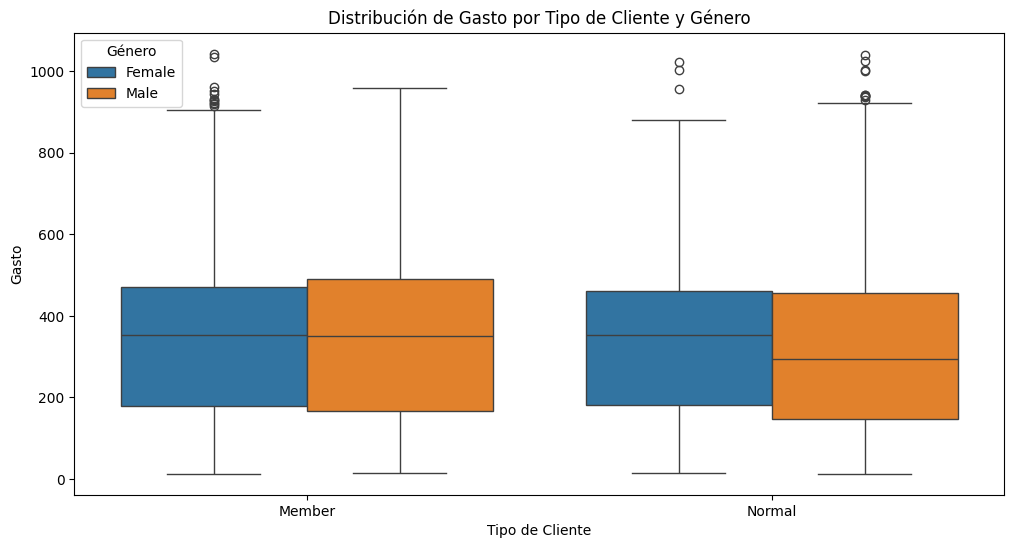

In [ ]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='Customer type', y='Total', hue='Gender', data=df)
plt.title('Distribución de Gasto por Tipo de Cliente y Género')
plt.xlabel('Tipo de Cliente')
plt.ylabel('Gasto')
plt.legend(title='Género')
plt.show()



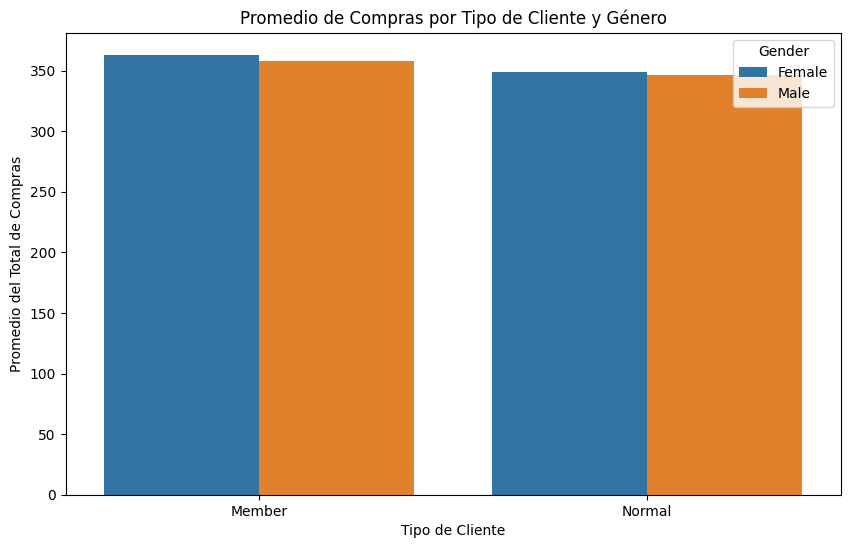

In [ ]:


grouped_data = df.groupby(['Customer type', 'Gender'])['Total'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Customer type', y='Total', hue='Gender', data=grouped_data)
plt.title('Promedio de Compras por Tipo de Cliente y Género')
plt.ylabel('Promedio del Total de Compras')
plt.xlabel('Tipo de Cliente')
plt.show()


Para reforzar este análisis, quiero además saber cuánto gasta cada cliente según si es miembro o no, dado que aunque los miembros compren más, quizás los no mimebros registran compras más caras.

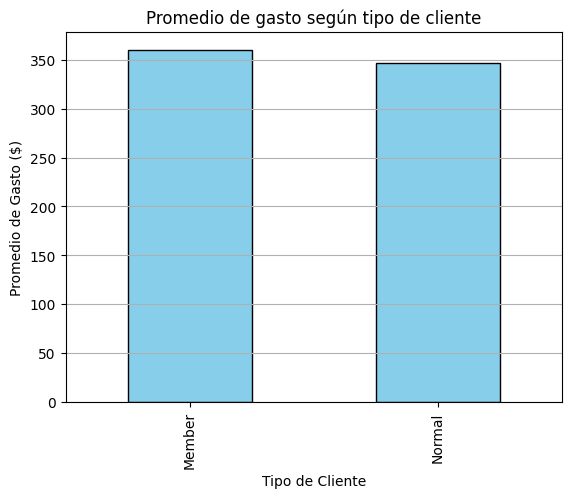

In [ ]:
df.groupby('Customer type')['Total'].mean().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Promedio de gasto según tipo de cliente')
plt.ylabel('Promedio de Gasto ($)')
plt.xlabel('Tipo de Cliente')
plt.grid(axis='y')
plt.show()


Ahora bien, me gustaría averiguar cuál o cuáles son las horas del día en las que más compras se efectúan. Para esto, utilizaré un gráfico lineal para evaluar la fluctuación del volumen de compras, según la hora del día. Como puede verse en el gráfico de abajo, las 19:00hs parecen ser la hora en la que más compras se efectúan.

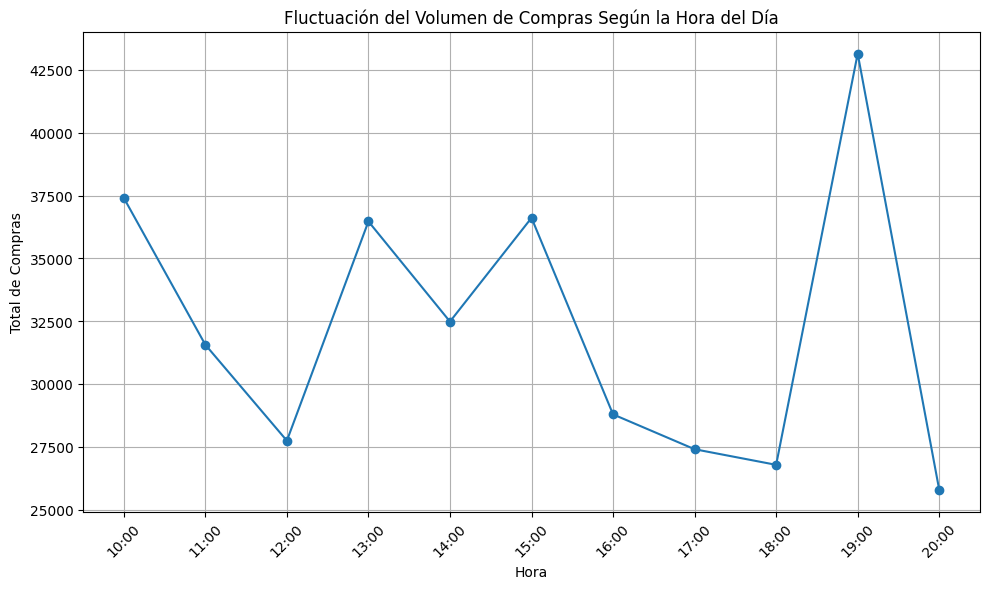

In [ ]:
import matplotlib.dates as mdates

df['Time_rounded'] = pd.to_datetime(df['Time'], format='%H:%M').dt.floor('H')

hourly_purchases = df.groupby('Time_rounded')['Total'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(hourly_purchases['Time_rounded'], hourly_purchases['Total'], marker='o')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))

plt.title('Fluctuación del Volumen de Compras Según la Hora del Día')
plt.xlabel('Hora')
plt.ylabel('Total de Compras')

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

In [ ]:
# El motivo por el que no aparece las 21hs es porque el dataset sólo contempla las compras efectuadas hasta las 20:59hs, demostrado por el siguiente método
df['Time_converted'] = pd.to_datetime(df['Time'], format='%H:%M:%S')

compras_despues_20 = df[df['Time_converted'].dt.time >= pd.to_datetime('20:00').time()].head(5)

print(compras_despues_20)

      Invoice ID Branch       City Customer type  Gender  \
3    123-19-1176      A     Yangon        Member    Male   
43   228-96-1411      C  Naypyitaw        Member  Female   
59   120-06-4233      C  Naypyitaw        Normal    Male   
87   633-44-8566      A     Yangon        Member    Male   
94   512-91-0811      C  Naypyitaw        Normal    Male   
95   594-34-4444      A     Yangon        Normal    Male   
106  628-34-3388      C  Naypyitaw        Normal    Male   
107  630-74-5166      A     Yangon        Normal    Male   
113  645-44-1170      A     Yangon        Member    Male   
114  237-01-6122      C  Naypyitaw        Member  Female   
118  642-32-2990      A     Yangon        Normal  Female   
119  378-24-2715      B   Mandalay        Normal    Male   
131  802-70-5316      A     Yangon        Member  Female   
136  700-81-1757      A     Yangon        Normal  Female   
189  593-65-1552      C  Naypyitaw        Normal  Female   
193  641-43-2399      B   Mandalay      

Me gustaría ver cómo el porcentaje total de compras se divide según el género, y para eso considero que la mejor visualización sería un gráfico de torta.

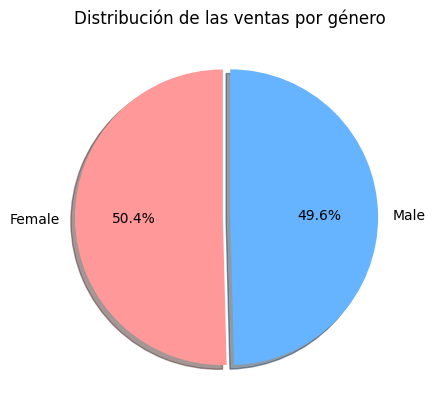

In [ ]:
df.groupby('Gender')['Total'].sum().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'], explode=(0.05, 0), shadow=True)
plt.title('Distribución de las ventas por género')
plt.ylabel('')
plt.show()


Con el fin de generar promociones con algún método de pago, sería intersante ver cuál es el más usado.

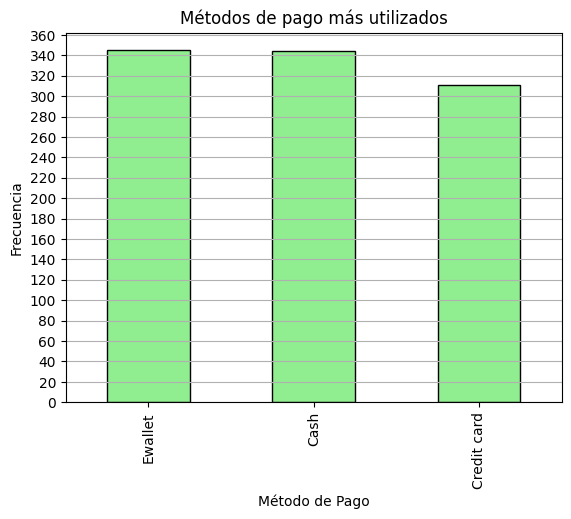

In [ ]:
payment_counts = df['Payment'].value_counts()
ax = payment_counts.plot(kind='bar', color='lightgreen', edgecolor='black')

y_ticks = np.arange(0, payment_counts.max() + 20, 20)
ax.set_yticks(y_ticks)

plt.title('Métodos de pago más utilizados')
plt.ylabel('Frecuencia')
plt.xlabel('Método de Pago')
plt.grid(axis='y')
plt.show()


Me gustaría saber qué línea de productos le genera más ingresos a la cadena de supermercados, así que usaré un gráfico de barras para medirlo.

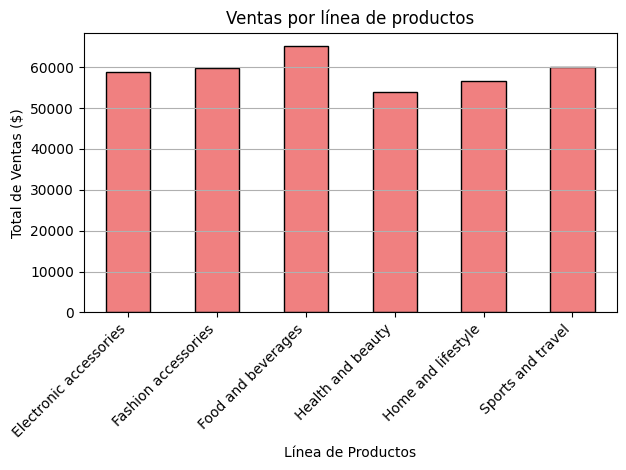

In [ ]:
df.groupby('Product line')['Total'].sum().plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Ventas por línea de productos')
plt.ylabel('Total de Ventas ($)')
plt.xlabel('Línea de Productos')
plt.grid(axis='y')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Quiero comprobar si el sistema de puntuación tiene relación con el gasto del cliente, o si no es un sistema que sea importante tomar en cuenta.

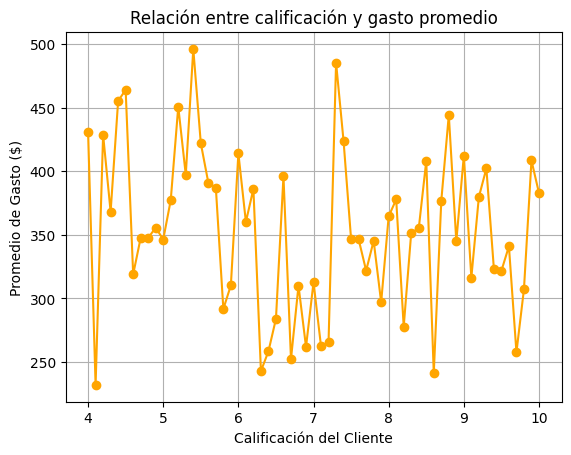

In [ ]:
df.groupby('Rating')['Total'].mean().plot(kind='line', marker='o', color='orange')
plt.title('Relación entre calificación y gasto promedio')
plt.ylabel('Promedio de Gasto ($)')
plt.xlabel('Calificación del Cliente')
plt.grid(True)
plt.show()


Finalmente, me gustaría saber qué sucursal genera más ingresos, con el fin de expandirla o alocar más mercancía allí.

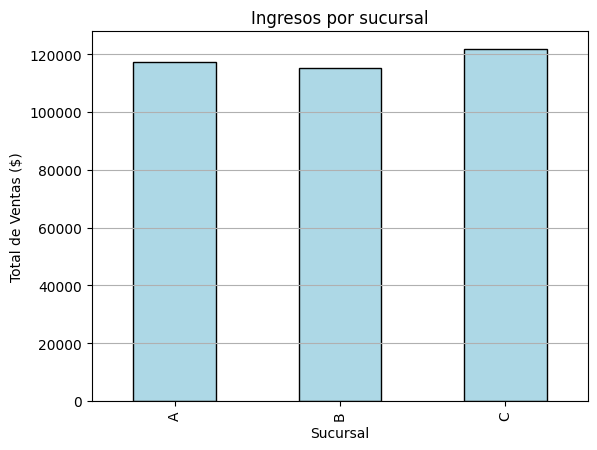

In [ ]:
df.groupby('Branch')['Total'].sum().plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Ingresos por sucursal')
plt.ylabel('Total de Ventas ($)')
plt.xlabel('Sucursal')
plt.grid(axis='y')
plt.show()


Hipótesis:


1 - El sistema de membresía parece ser uno que da resultado: podemos ver claramente que los clientes miembros son los que más compran, según el primer gráfico, y los que más gastan también, según el segundo.

2 - La apertura de los supermercados y las 19:00hs son los momentos en los que más ventas se registran, con lo cual, antes de la apertura, y de 16:00 a 18:00hs podrían resultar las horas más efectivas para llevar a cabo restocks. Por otro lado, las 12:00hs parecería la mejor hora para coordinar breaks.

3 - La diferencia de distribución de ventas por género es prácitcamente despreciable, por lo que no sería una buena idea generar publicidad apuntada a un género en específico o a las compras que realiza. Por esto último no consideré necesario medir qué líneas de producto consume más cada género.

4 - Los métodos de pago tipo cash o e-wallet parecen ser los más frecuentes. Esto podría indicar que la gente no planea compras utilizando tarjeta de crédito dado que las compras en supermercado suelen no ser gastos que necesiten ser pagados en cuotas y se suelen consumir a lo largo del mes. Por este motivo, quizás sería intersante entrar en conversaciones con alguna e-wallet y conseguir algún tipo de convenio o beneficio mutuo para aprovechar el uso tan frecuente de este medio de pago en supers.

5 - Por un margen bastante grande, Food and beverages es la línea de productos que más ingresos genera. Este es un resultado lógico, dado que por lo general, las compras del super suelen abarcar la comida y bebida del mes. Sin embargo Health and beauty y Home and lifestyle parecen estar bastante por debajo de el resto de líneas. Esto puede deberse a que para compras de este tipo de productros, la mayoría de gente probablemente acudiría a farmacias o decos. Para palear esto, estas dos líneas de productos podrían ser suceptibles de descuentos o promociones.

6 -  En cuanto al sistema de puntuaciones, si bien los resultados parecen un poco aleatorios, podemos ver que los puntajes más altos están reservados para gastos de entre aproximadamente $300 y $450, con los puntajes más bajos ubicandose entre aproximadamente $350 y $500, y los medianos en general en compras de bajo costo. La hipótesis en este caso sería que es más difícil complacer a los clientes mientras mayor sea el gasto, y que esto podría tratar de arreglarse con promociones para gastos mayores a $400 o medidas similares.

7 - Por último, la sucursal C es la que más ingresos registra, por lo que se podría considerar una posible expansión en cuanto a tamaño o en cuanto a volumen de stock para la misma.